In [1]:
import os
%run affine.py
from osgeo import gdal, osr

In [2]:
rng = np.random.default_rng(999)

In [3]:
# gcps = []
px = rng.uniform(0, 799, size = 4)
py = rng.uniform(0, 599, size = 4)

X = rng.uniform(-180, 180, size = 4)
Y = rng.uniform(-90, 90, size = 4)
gcps_lst = list(zip(X, Y, px, py))
    
    # gcp = gdal.GCP(X, Y, 0, px, py)
    # gcps.append(gcp)

In [4]:
gcps_lst

[(np.float64(147.93952308870604),
  np.float64(2.327283624665725),
  np.float64(622.2811890466377),
  np.float64(102.49433703793743)),
 (np.float64(-111.3216218784706),
  np.float64(24.891853741700032),
  np.float64(137.6266560291843),
  np.float64(540.2528119295063)),
 (np.float64(20.6639647327448),
  np.float64(-3.1556200738362463),
  np.float64(570.1446619661385),
  np.float64(84.92714352482984)),
 (np.float64(40.34292524539279),
  np.float64(-38.01492663503724),
  np.float64(599.5177271454444),
  np.float64(366.1259940916348))]

In [ ]:
for i, gcp in enumerate(gcps):
    print(f"GCP {i}:")
    print(f"  pixel,line = ({gcp.GCPPixel}, {gcp.GCPLine})")
    print(f"  X,Y,Z      = ({gcp.GCPX}, {gcp.GCPY}, {gcp.GCPZ})")

In [ ]:
gt = gdal.GCPsToGeoTransform(gcps)

In [ ]:
gt

In [ ]:
res_lst = []
for (X, Y, px, py) in gcps_lst:
    pred_X, pred_Y = transform( (px, py), gt[0:3], gt[3:] )
    res_x = (pred_X - X)**2
    res_y = (pred_Y - Y)**2
    res = np.sqrt(res_x + res_y)
    print( (X, Y, px, py) )
    print(pred_X, pred_Y)
    res_lst.append(res)

In [ ]:
res_lst

In [7]:
gcps_lst_cp, E12, N12, E21, N21 = py_GCPTransformer(gcps_lst, False, -1, 3)

In [8]:
print(f"{gcps_lst}\n")
print(f"{E12}\n")
print(f"{N12}")

[(np.float64(147.93952308870604), np.float64(2.327283624665725), np.float64(622.2811890466377), np.float64(102.49433703793743)), (np.float64(-111.3216218784706), np.float64(24.891853741700032), np.float64(137.6266560291843), np.float64(540.2528119295063)), (np.float64(20.6639647327448), np.float64(-3.1556200738362463), np.float64(570.1446619661385), np.float64(84.92714352482984)), (np.float64(40.34292524539279), np.float64(-38.01492663503724), np.float64(599.5177271454444), np.float64(366.1259940916348))]

[-1.09124355e+02  3.33882701e-01 -1.00683745e-01]

[116.42569812  -0.17712195  -0.12606045]


In [9]:
py_res_lst = []
for (X, Y, px, py) in gcps_lst_cp:
    pred_X, pred_Y = transform( (px, py), E12, N12 )
    res_x = (pred_X - X)**2
    res_y = (pred_Y - Y)**2
    res = np.sqrt(res_x + res_y)
    # print( (X, Y, px, py) )
    print(pred_X, pred_Y)
    py_res_lst.append(res)
py_res_lst
# correct

88.32505516492675 -6.714443421892078
-117.56787199841146 23.94448491302508
72.68630151267544 4.734608353424695
54.18130650918238 -35.91605918706532


[np.float64(60.29624875412868),
 np.float64(6.317685356078305),
 np.float64(52.617290206536495),
 np.float64(13.99664390367058)]

In [10]:
transform( (400, 200), E12, N12)

(np.float64(4.291976084393937), np.float64(20.36482743679551))

# Testing Refine

In [11]:
gcps_lst_cp, E12, N12, E21, N21 = py_GCPTransformer(gcps_lst, True, -1, 3)

In [12]:
print(f"{gcps_lst_cp}\n")
print(f"{E12}\n")
print(f"{N12}")

[(np.float64(-111.3216218784706), np.float64(24.891853741700032), np.float64(137.6266560291843), np.float64(540.2528119295063)), (np.float64(20.6639647327448), np.float64(-3.1556200738362463), np.float64(570.1446619661385), np.float64(84.92714352482984)), (np.float64(40.34292524539279), np.float64(-38.01492663503724), np.float64(599.5177271454444), np.float64(366.1259940916348))]

[-1.76841056e+02  3.41298191e-01  3.43315290e-02]

[ 1.06155105e+02 -1.75997246e-01 -1.05582679e-01]


In [13]:
py_res_lst = []
for (X, Y, px, py) in gcps_lst:
    pred_X, pred_Y = transform( (px, py), E12, N12 )
    res_x = (pred_X - X)**2
    res_y = (pred_Y - Y)**2
    res = np.sqrt(res_x + res_y)
    # print( (X, Y, px, py) )
    print(pred_X, pred_Y)
    py_res_lst.append(res)
py_res_lst
# correct

39.061175726091165 -14.186296591998143
-111.32162187847064 24.89185374170011
20.663964732744656 -3.155620073836154
40.34292524539269 -38.014926635037156


[np.float64(110.12353452367218),
 np.float64(8.903074960742904e-14),
 np.float64(1.7248049877506383e-13),
 np.float64(1.3101760682293512e-13)]

In [14]:
transform( (400, 200), E12, N12)

(np.float64(-33.45547349715949), np.float64(14.639671317705762))

In [5]:
gcps_lst_cp, E12, N12, E21, N21 = py_GCPTransformer(gcps_lst, True, -1, 4)

In [6]:
print(f"{gcps_lst_cp}\n")
print(f"{E12}\n")
print(f"{N12}")

[(np.float64(147.93952308870604), np.float64(2.327283624665725), np.float64(622.2811890466377), np.float64(102.49433703793743)), (np.float64(-111.3216218784706), np.float64(24.891853741700032), np.float64(137.6266560291843), np.float64(540.2528119295063)), (np.float64(20.6639647327448), np.float64(-3.1556200738362463), np.float64(570.1446619661385), np.float64(84.92714352482984)), (np.float64(40.34292524539279), np.float64(-38.01492663503724), np.float64(599.5177271454444), np.float64(366.1259940916348))]

[-1.09124355e+02  3.33882701e-01 -1.00683745e-01]

[116.42569812  -0.17712195  -0.12606045]


In [7]:
py_res_lst = []
for (X, Y, px, py) in gcps_lst:
    pred_X, pred_Y = transform( (px, py), E12, N12 )
    res_x = (pred_X - X)**2
    res_y = (pred_Y - Y)**2
    res = np.sqrt(res_x + res_y)
    # print( (X, Y, px, py) )
    print(pred_X, pred_Y)
    py_res_lst.append(res)
py_res_lst
# correct

88.32505516492675 -6.714443421892078
-117.56787199841146 23.94448491302508
72.68630151267544 4.734608353424695
54.18130650918238 -35.91605918706532


[np.float64(60.29624875412868),
 np.float64(6.317685356078305),
 np.float64(52.617290206536495),
 np.float64(13.99664390367058)]

In [8]:
transform( (400, 200), E12, N12)

(np.float64(4.291976084393937), np.float64(20.36482743679551))

# Testing gdalwarp

In [23]:
# rng = np.random.default_rng(999)

# px = rng.uniform(0, 799, size = 4)
# py = rng.uniform(0, 599, size = 4)

# X = rng.uniform(90, 150, size = 4)
# Y = rng.uniform(-10, 20, size = 4)

# gcps = [gdal.GCP(X[i], Y[i], 0, px[i], py[i]) for i in range(4)]

# width = 800
# height = 600

# driver = gdal.GetDriverByName("GTiff")
# ds = driver.Create(
#     "test_with_gcps.tif",
#     width,
#     height,
#     1,
#     gdal.GDT_Float64
# )

# band = ds.GetRasterBand(1)
# band.WriteArray(np.random.uniform(low = 0, high = 1, size = (height, width)))
# band.FlushCache()

# srs = osr.SpatialReference()
# srs.ImportFromEPSG(4326)

# ds.SetGCPs(gcps, srs.ExportToWkt())

# gdal_translate \
#     -a_srs EPSG:4326 \
#     -of GTiff \
#     -co BIGTIFF=YES \
#     -co TILED=YES \
#     -r cubic \
#     -gcp 622.281189046638 102.494337037937 147.939523088706 2.32728362466572 \
#     -gcp 137.626656029184 540.252811929506 -111.321621878471 24.8918537417 \
#     -gcp 570.144661966139 84.9271435248298 20.6639647327448 -3.15562007383625 \ 
#     -gcp 599.517727145444 366.125994091635 40.3429252453928 -38.0149266350372 \
#     test_with_gcps3.tif \
#     test_with_gcps_reapplied.tif

# gdalwarp \
#     -t_srs EPSG:4326 \
#     -co BIGTIFF=YES \
#     -ot UInt16 \
#     -te -180 -90 180 90 \ Added this line for warp_test2.tif
#     test_with_gcps_reapplied.tif \
#     warp_test.tif

In [2]:
rng = np.random.default_rng(999)

px = rng.uniform(0, 799, size = 4)
py = rng.uniform(0, 599, size = 4)

X = rng.uniform(140, 150, size = 4)
Y = rng.uniform(15, 20, size = 4)

gcps_lst = list(zip(X, Y, px, py))

In [4]:
width = 800
height = 600

driver = gdal.GetDriverByName("GTiff")
ds = driver.Create(
    "test_with_gcps.tif",
    width,
    height,
    1,
    gdal.GDT_Float64
)

band = ds.GetRasterBand(1)
band.WriteArray(np.random.uniform(low = 0, high = 1, size = (height, width)))
band.FlushCache()

band = None
ds = None

/home/nzhihao/miniforge3/envs/alvin/lib/python3.14/site-packages/osgeo/gdal.py:606: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [7]:
ds_warp = gdal.Open("warp_test.tif")
gt34 = ds_warp.GetGeoTransform()
gt43 = gdal.InvGeoTransform(gt34)
print(gt34)
print(gt43)

(140.0, 0.007633587786259542, 0.0, 20.0, 0.0, -0.007633587786259542)
(-18340.0, 131.0, 0.0, 2620.0, 0.0, -131.0)


In [8]:
gcps_lst_cp, E12, N12, E21, N21 = py_GCPTransformer(gcps_lst, False, dfTolerance = -1, nGCPmin = -1)
print(E12)
print(N12)

[ 1.41968768e+02  9.27451947e-03 -2.79677069e-03]
[ 2.07340472e+01 -4.92005425e-03 -3.50167909e-03]


In [9]:
# From src_pixel to lat-lon: do E12, N12
# From lat-lon to dest_pixel: do gt43
# From dest-pixel to lat-lon: do gt34

In [20]:
# First consider our GCPs src pixels:

for i, gcp in enumerate(gcps_lst):
    x_pred, y_pred = transform(gcp[2:], E12, N12)
    x_dest, y_dest = transform((x_pred, y_pred), gt43[:3], gt43[3:])
    
    # x_dcrs, y_dcrs = transform((x_dest, y_dest), gt34[:3], gt34[3:])

    print(f"For GCP {i}")
    print(f"For CRS:4326 value of:\n {x_pred}, {y_pred}")
    print(f"It should be dest pixel of:\n {x_dest}, {y_dest}")
    # print(f"{x_pred} vs {x_dcrs}")
    # print(f"{y_pred} vs {y_dcrs}")

print(f"For src_xp, src_yp = 400, 200")
x_pred, y_pred = transform((400,200), E12, N12)
x_dest, y_dest = transform((x_pred, y_pred), gt43[:3], gt43[3:])

print(f"For CRS:4326 value of:\n {x_pred}, {y_pred}")
print(f"It should be dest pixel of:\n {x_dest}, {y_dest}")

For GCP 0
For CRS:4326 value of:
 147.4534737545813, 17.313487682725206
It should be dest pixel of:
 976.4050618501497, 351.93311356299773
For GCP 1
For CRS:4326 value of:
 141.73422577782188, 18.165124580917357
It should be dest pixel of:
 227.18357689466575, 240.36867989982602
For GCP 2
For CRS:4326 value of:
 147.01906393090763, 17.631516898706227
It should be dest pixel of:
 919.4973749489, 310.27128626948434
For GCP 3
For CRS:4326 value of:
 146.5050362919217, 16.502331689248177
It should be dest pixel of:
 852.1597542417439, 458.19454870848904
For src_xp, src_yp = 400, 200
For CRS:4326 value of:
 145.1192215578998, 18.065689651022087
It should be dest pixel of:
 670.6180240848735, 253.39465571610663


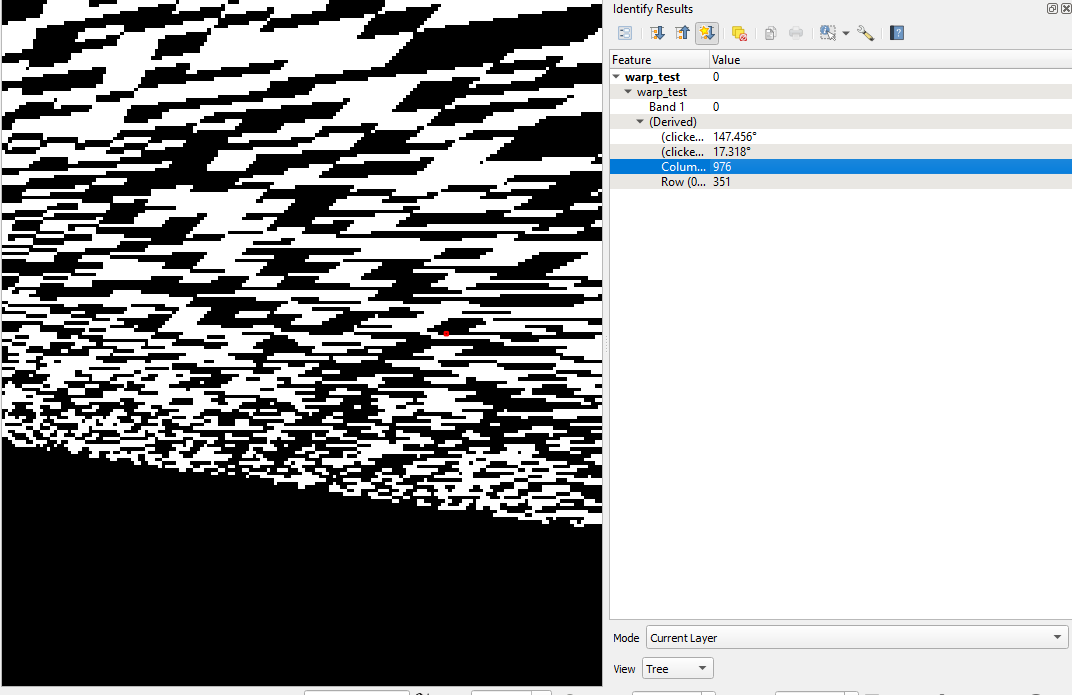
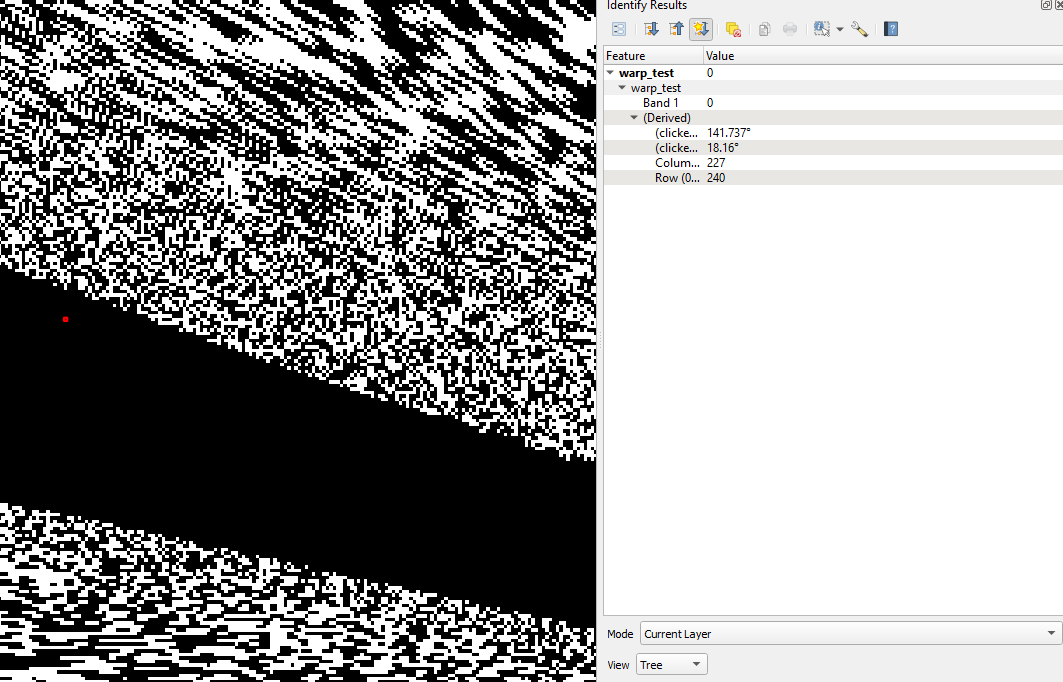
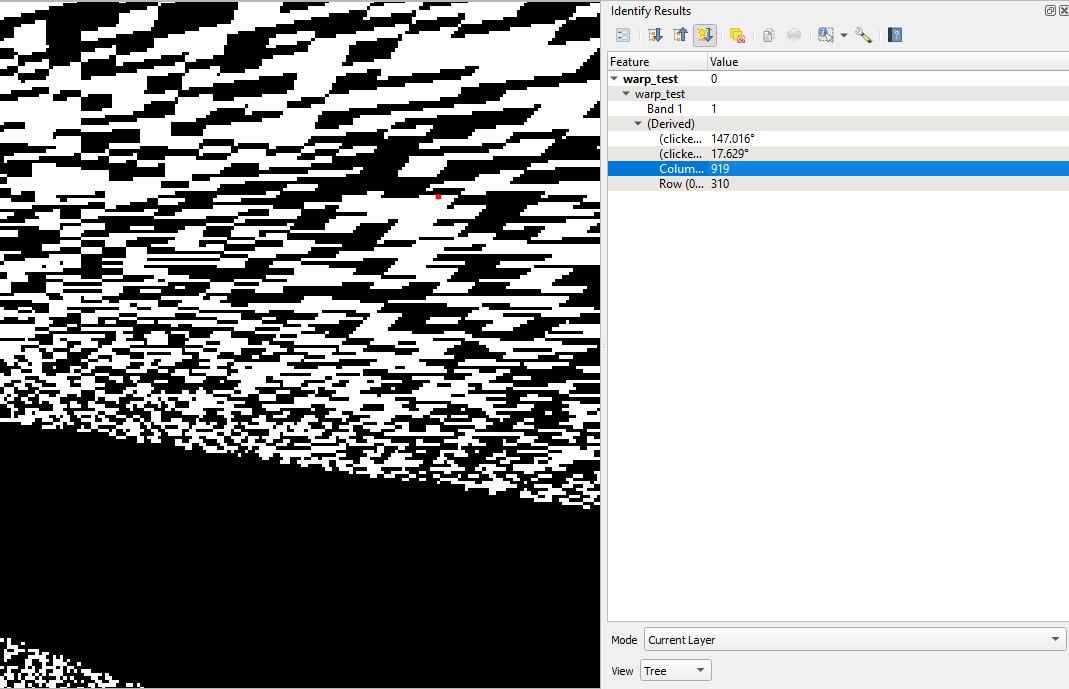
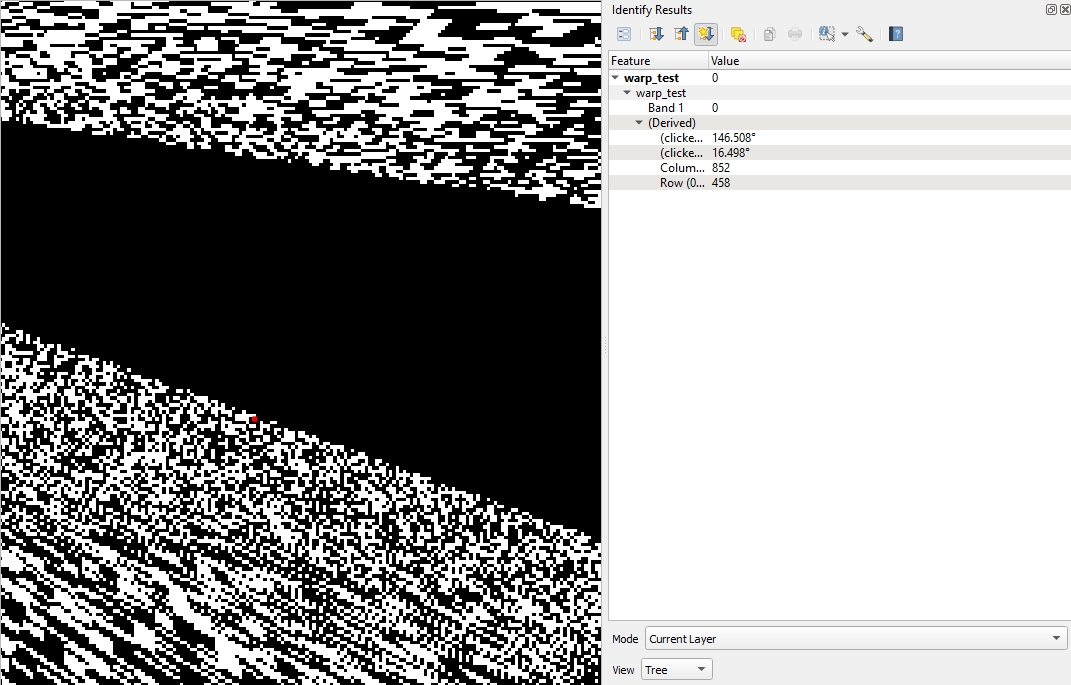
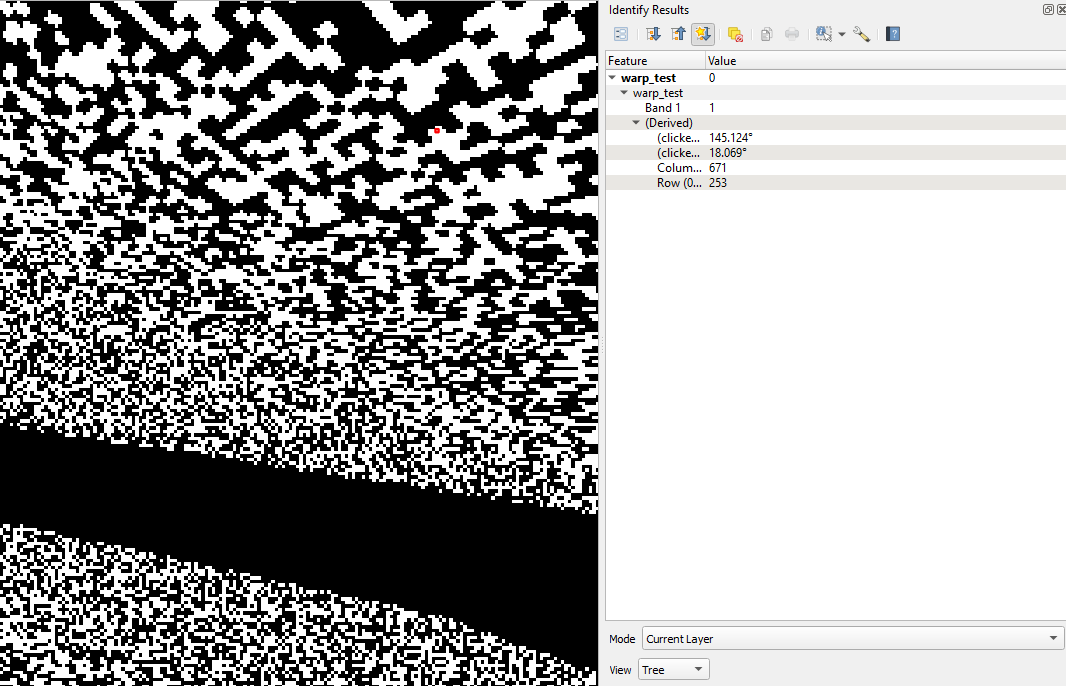